
**Hola!**

Mi nombre es Enrique Romero

<div class="alert alert-danger">
<b>️⚠️  Comentario del revisor:</b> Esto destaca los comentarios más importantes. Sin su desarrollo, el proyecto no será aceptado. </div>

<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Así que los pequeños comentarios están resaltados. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberá hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.
</div>

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Así que destaco todos los demás comentarios.</div>

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Por ejemplo, asi.</div>

Todo esto ayudará a volver a revisar tu proyecto más rápido.


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns 
from math import factorial
from scipy import stats as st
import math as mt
import matplotlib.pyplot as plt

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

llamadas = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
mensajes = pd.read_csv('/datasets/megaline_messages.csv')
planes   = pd.read_csv('/datasets/megaline_plans.csv')
usuarios = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
planes

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Al tener solo 2 filas de datos podemos mostrar la tabla completa con los datos.**

## Corregir datos

**Verificiamos si existen datos ausentes o duplicados**

In [5]:
display(planes.isna().sum())
planes[planes.duplicated()]

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name


## Enriquecer los datos

**No existen filas con valores ausentes para rellenar o duplicados para eliminar**

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
usuarios.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
usuarios.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
85,1085,Ignacio,Bennett,48,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-07-19,ultimate,NaN
316,1316,Lucilla,Weeks,59,"Tulsa, OK MSA",2018-05-21,surf,NaN
449,1449,Boyd,Kelley,39,"Seattle-Tacoma-Bellevue, WA MSA",2018-10-04,surf,NaN
414,1414,Georgianne,Herring,30,"Urban Honolulu, HI MSA",2018-03-03,surf,2018-09-01
182,1182,Jeff,Burt,39,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-05-29,surf,NaN


**Con la informacion mostrada podemos ver que existen valores ausentes para la columna de fecha**

### Corregir los datos

**Verificamos la cantidad de filas con valores ausentes y duplicados**

In [8]:
display(usuarios['churn_date'].isna().sum())
usuarios[usuarios.duplicated()]


466

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


### Enriquecer los datos

**Cambiamos la columna 'reg_date' a tipo datatime para extraer informacion referente a las fechas**


In [9]:
usuarios['reg_date'] = pd.to_datetime(usuarios['reg_date'], format='%Y-%m-%d')
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


**Los valores ausentes en la columna de 'churn_data' no los modificaremos ya que por el momento no es necesario hacer uso de ellos**

## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
llamadas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para las llamadas

llamadas.sample(5)

,id,user_id,call_date,duration
47385,1171_416,1171,2018-09-10,0.48
45727,1164_426,1164,2018-05-31,0.00
89167,1324_1238,1324,2018-09-25,18.30
3362,1011_215,1011,2018-10-26,0.00
69249,1248_156,1248,2018-12-15,4.69


### Corregir los datos

**Verificamos la presencia de valores duplicados y ausentes.**

In [12]:
display(llamadas.isna().sum())
llamadas.duplicated().sum()


id           0
user_id      0
call_date    0
duration     0
dtype: int64

0

### Enriquecer los datos

**Realizamos el cambio a la columna 'call_date' a tipo datatime y redondeamos hacia arriba los valores de la columna'duration' con el metodo ceil de numpy, tal como nos lo piden en el enuciado. Ademas agregamos la columna 'month'**

In [13]:
llamadas['duration']=np.ceil(llamadas['duration'])
llamadas['call_date'] = pd.to_datetime(llamadas['call_date'], format='%Y-%m-%d')
llamadas['month'] = llamadas['call_date'].dt.month
llamadas.sample(5)


,id,user_id,call_date,duration,month
132820,1479_47,1479,2018-11-19,9.0,11
112005,1393_202,1393,2018-11-21,11.0,11
54696,1196_588,1196,2018-07-27,19.0,7
108763,1384_84,1384,2018-09-04,0.0,9
72365,1257_105,1257,2018-07-08,2.0,7


## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
mensajes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Imprime una muestra de datos para los mensajes

mensajes.sample(5)

,id,user_id,message_date
46188,1315_36,1315,2018-11-25
74711,1483_41,1483,2018-07-22
13723,1091_40,1091,2018-10-24
36889,1247_53,1247,2018-12-30
36048,1237_69,1237,2018-10-18


### Corregir los datos


**Verificamos si hay datos duplicados o ausentes**

In [16]:
display(mensajes.isna().sum())
mensajes.duplicated().sum()

id              0
user_id         0
message_date    0
dtype: int64

0

### Enriquecer los datos

**Como lo hicimos anteriormete, realizamos el cambio a la columna 'message_date' a tipo datatime,. Ademas agregamos la columna 'month'**

In [17]:
mensajes['message_date'] = pd.to_datetime(mensajes['message_date'], format='%Y-%m-%d')
mensajes['month'] = mensajes['message_date'].dt.month
mensajes.sample(5)

,id,user_id,message_date,month
52242,1336_197,1336,2018-11-25,11
2088,1027_71,1027,2018-12-12,12
31713,1196_198,1196,2018-12-31,12
17288,1114_98,1114,2018-11-24,11
13264,1088_235,1088,2018-12-05,12


## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
# Imprime una muestra de datos para el tráfico de internet

internet.sample(5)

,id,user_id,session_date,mb_used
74838,1353_1,1353,2018-09-19,35.93
102184,1489_196,1489,2018-11-23,27.05
47064,1210_202,1210,2018-07-22,604.26
48895,1219_5,1219,2018-12-19,683.60
8930,1046_215,1046,2018-08-18,498.19


### Corregir los datos

**Verificamos la presencia de valores ausentes o duplicados**

In [20]:
display(internet.isna().sum())
internet.duplicated().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

0

### Enriquecer los datos

**Realizamos el cambio a la columna 'session_date' a tipo datatime y agregamos una nueva columna 'month'.**

In [21]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] =internet['session_date'].dt.month
internet.sample(5)

,id,user_id,session_date,mb_used,month
57435,1258_595,1258,2018-11-30,278.39,11
96027,1448_255,1448,2018-10-24,340.64,10
56196,1254_134,1254,2018-11-12,424.83,11
9390,1049_40,1049,2018-12-19,0.00,12
95980,1448_14,1448,2018-11-07,222.00,11


## Estudiar las condiciones de las tarifas

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

planes

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario



In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
llamadas_mes = llamadas.groupby(['user_id','month'])[['id']].count()
llamadas_mes = llamadas_mes.reset_index().rename({'id':'llam_xmes'},axis=1)
llamadas_mes.head()

,user_id,month,llam_xmes
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [46]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutos_mes = llamadas.groupby(['user_id','month'])[['duration']].sum()
minutos_mes = minutos_mes.reset_index().rename({'duration':'minutos_xmes'},axis=1)
minutos_mes.head()

,user_id,month,minutos_xmes
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0


In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
mensajes_mes = mensajes.groupby(['user_id','month'])[['id']].count()
mensajes_mes = mensajes_mes.reset_index().rename({'id':'msj_xmes'},axis=1)
mensajes_mes.head()

,user_id,month,msj_xmes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [26]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_mes = internet.groupby(['user_id','month'])[['mb_used']].sum()
internet_mes = internet_mes.reset_index().rename({'mb_used':'gb_xmes'}, axis=1)
internet_mes['gb_xmes'] = internet_mes['gb_xmes'] / 1024
internet_mes['gb_xmes'] = np.ceil(internet_mes['gb_xmes'])
internet_mes.head()

,user_id,month,gb_xmes
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0


In [27]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
data = llamadas_mes.merge(minutos_mes,on=['user_id','month'],how='outer')
data = data.merge(mensajes_mes,on=['user_id','month'],how='outer')
data = data.merge(internet_mes,on=['user_id','month'],how='outer')
data = data.merge(usuarios,on='user_id',how='outer')
data.head()

,user_id,month,llam_xmes,minutos_xmes,msj_xmes,gb_xmes,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12.0,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,8.0,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1001,9.0,49.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
3,1001,10.0,65.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
4,1001,11.0,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


In [28]:
# Añade la información de la tarifa

planes = planes.rename({'plan_name':'plan'}, axis=1)
datos = pd.merge(data,planes, on='plan', how='outer')
datos['mb_per_month_included'] = datos['mb_per_month_included'] /1024 
datos = datos.rename({'mb_per_month_included':'gb_per_month_included'}, axis=1)
print('Dataframe completo')
datos.head()

Dataframe completo


,user_id,month,llam_xmes,minutos_xmes,msj_xmes,gb_xmes,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30.0,3000,70,7,0.01,0.01
1,1006,11.0,2.0,10.0,15.0,3.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30.0,3000,70,7,0.01,0.01
2,1006,12.0,9.0,59.0,139.0,32.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30.0,3000,70,7,0.01,0.01
3,1008,10.0,71.0,476.0,21.0,17.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1000,30.0,3000,70,7,0.01,0.01
4,1008,11.0,63.0,446.0,37.0,24.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1000,30.0,3000,70,7,0.01,0.01


In [29]:
# Calcula el ingreso mensual para cada usuario

# minutos extra
min_extra = datos['minutos_xmes'] - datos['minutes_included']
min_extra = min_extra.fillna(0)
min_extra = [0 if x < 0 else x for x in min_extra]
min_extra = pd.Series(min_extra)
datos['min_extra'] = min_extra * datos['usd_per_minute']

# mensajes extra
msj_extra = datos['msj_xmes'] - datos['messages_included']
msj_extra = msj_extra.fillna(0)
msj_extra = [0 if x < 0 else x for x in msj_extra]
msj_extra = pd.Series(msj_extra)
datos['msj_extra'] = msj_extra * datos['usd_per_message']

# internet extra
gb_extra = datos['gb_xmes'] - datos['gb_per_month_included']
gb_extra = gb_extra.fillna(0)
gb_extra = [0 if x < 0 else x for x in gb_extra]
gb_extra = pd.Series(gb_extra)
datos['gb_extra'] = gb_extra * datos['usd_per_gb']
datos.query('min_extra > 0 or msj_extra > 0 or gb_extra> 0').sample(5)

# ingreso total
datos['total_pay'] =  datos['min_extra'] + datos['msj_extra'] + datos['gb_extra'] + datos['usd_monthly_pay']
datos.sample(5)

,user_id,month,llam_xmes,minutos_xmes,msj_xmes,gb_xmes,first_name,last_name,age,city,...,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,min_extra,msj_extra,gb_extra,total_pay
1395,1210,6.0,67.0,520.0,NaN,15.0,Shanae,Carrillo,30,"Oklahoma City, OK MSA",...,15.0,500,20,10,0.03,0.03,0.60,0.0,0.0,20.60
1836,1343,8.0,19.0,115.0,38.0,7.0,Teresia,Ewing,43,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",...,15.0,500,20,10,0.03,0.03,0.00,0.0,0.0,20.00
1616,1284,12.0,117.0,965.0,NaN,21.0,Yuri,Odom,51,"Dayton-Kettering, OH MSA",...,15.0,500,20,10,0.03,0.03,13.95,0.0,60.0,93.95
1253,1167,9.0,60.0,449.0,44.0,13.0,Rebbecca,Nicholson,47,"Denver-Aurora-Lakewood, CO MSA",...,15.0,500,20,10,0.03,0.03,0.00,0.0,0.0,20.00
1318,1182,5.0,4.0,23.0,NaN,1.0,Jeff,Burt,39,"Charlotte-Concord-Gastonia, NC-SC MSA",...,15.0,500,20,10,0.03,0.03,0.00,0.0,0.0,20.00


## Estudia el comportamiento de usuario

### Llamadas

plan,surf,ultimate
month,,
1.0,30.000000,28.000000
2.0,40.666667,68.000000
3.0,46.434783,46.000000
4.0,48.880000,47.523810
5.0,57.186667,57.586207
6.0,60.093750,54.488889
7.0,63.683333,58.694915
8.0,58.647799,60.070423
9.0,59.020942,61.046512


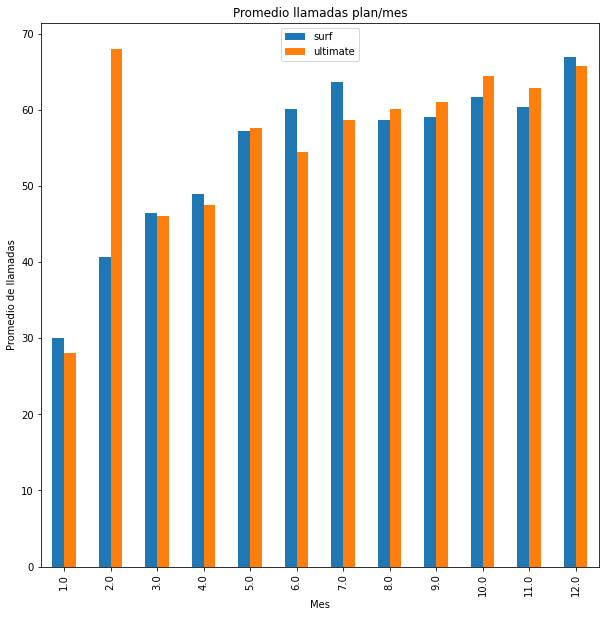

In [30]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
prom_llam_mes = datos.groupby(['month','plan'])['llam_xmes'].mean().reset_index()
prom_llam_mes = prom_llam_mes.pivot(index='month', columns='plan', values='llam_xmes')
display(prom_llam_mes)
prom_llam_mes.plot(kind='bar',
                   title='Promedio llamadas plan/mes',
                   xlabel='Mes',
                   ylabel='Promedio de llamadas',
                   figsize=[10,10]             
                   )
plt.legend(['surf', 'ultimate'])
plt.show()

**Haciendo la comparacion a traves el grafico podemos observar que para el plan 'ultimate' el mes de febrero(2) existe una diferencia mayor en comparacion con el plan 'surf', para el resto de los meses se puede apreciar que el promedio de llamadas esta distribuido de manera similar para ambos planes**


---------------

array([[<AxesSubplot:title={'center':'surf'}>,
        <AxesSubplot:title={'center':'ultimate'}>]], dtype=object)

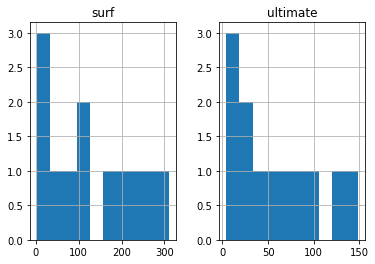

In [31]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

min_plan_mes = datos.groupby(['month','plan'])[['minutos_xmes']].count().reset_index()
min_plan_mes = min_plan_mes.pivot(index='month', columns='plan', values='minutos_xmes')
min_plan_mes.hist()


**Para la distribucion de la cantidad de minutos promedio que necesitan los usuarios de cada plan podemos decir que existe similitud entre ambos planes**

In [32]:
# Calcula la media y la varianza de la duración mensual de llamadas.

prom = datos['minutos_xmes']
print('media:', prom.mean())
varianza = np.var(prom)
print('varianza:', varianza)
desv_std = np.sqrt(varianza)
print('desviacion estandar:', desv_std)


media: 435.9375553587245
varianza: 53787.33666754012
desviacion estandar: 231.92097073688726


min: 1180.0
max: 220004.0
media(): 82028.91666666667


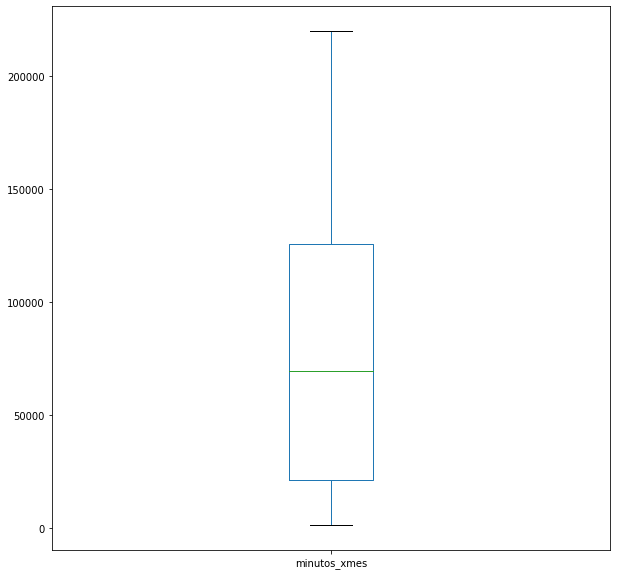

In [33]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
duracion_llam_xmes =   datos.groupby('month')['minutos_xmes'].sum()
duracion_llam_xmes.plot(kind='box',
                        figsize=[10,10]
)
print('min:',duracion_llam_xmes.min())
print('max:',duracion_llam_xmes.max())
print('media():',duracion_llam_xmes.mean())

**Segun el diagrama de caja y bigotes podemos observar que la media es de 82028,9 teniendo una valor maximo de 220004 y un valor minimo de 180**

### Mensajes

plan,surf,ultimate
month,,
1.0,2,4
2.0,9,7
3.0,23,12
4.0,50,21
5.0,77,29
6.0,97,47
7.0,121,59
8.0,162,71
9.0,194,86


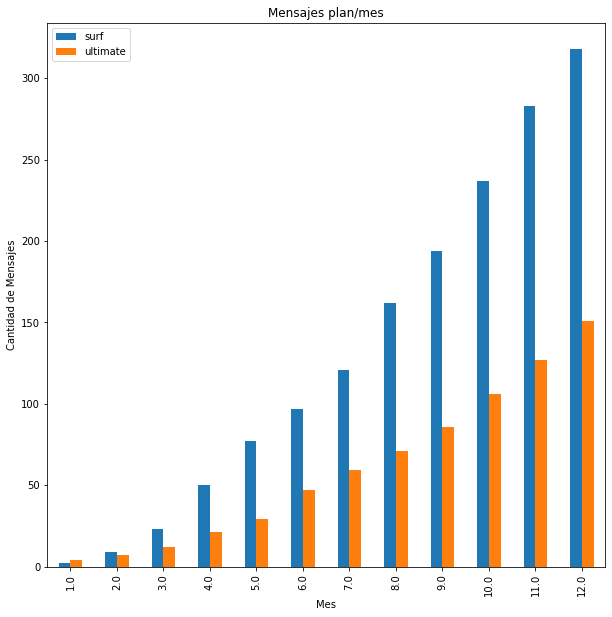

In [34]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
msj_xmes_xplan = datos.groupby(['plan','month'])[['user_id']].count().reset_index()
msj_xmes_xplan = msj_xmes_xplan.pivot(index='month', columns='plan', values='user_id')
display(msj_xmes_xplan)
msj_xmes_xplan.plot(kind='bar',
                   title='Mensajes plan/mes',
                   xlabel='Mes',
                   ylabel='Cantidad de Mensajes',
                   figsize=[10,10]             
                   )
plt.legend(['surf', 'ultimate'])
plt.show()

**Con el grafico obtenido podemos observar facilemente que los usuarios del plan 'surf' tiene a enviar poco mas del doble de mensajes que los usuarios del plan 'ultimate'**

---------------

plan,surf,ultimate
month,,
1.0,10.0,29.0
2.0,110.0,121.0
3.0,312.0,221.0
4.0,611.0,343.0
5.0,1087.0,489.0
6.0,1502.0,725.0
7.0,2042.0,973.0
8.0,2735.0,1267.0
9.0,3238.0,1463.0


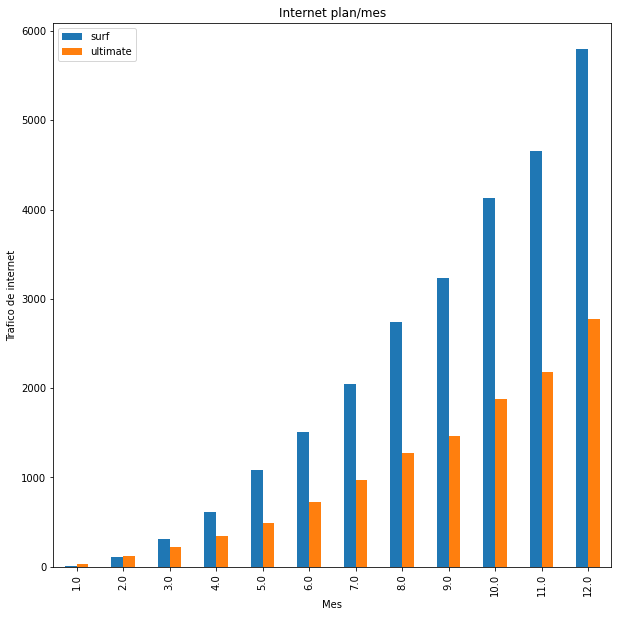

In [35]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet_xmes_xplan = datos.groupby(['plan','month'])[['gb_xmes']].sum().reset_index()
internet_xmes_xplan = internet_xmes_xplan.pivot(index='month', columns='plan', values='gb_xmes')
display(internet_xmes_xplan)
internet_xmes_xplan.plot(kind='bar',
                   title='Internet plan/mes',
                   xlabel='Mes',
                   ylabel='Trafico de internet',
                   figsize=[10,10]             
                   )
plt.legend(['surf', 'ultimate'])
plt.show()

**De igual manera que con los mensajes, podemos ver que los usuarios del plan 'surf' tienden a tener una mayor consumo de internet que los usuarios del plan 'ultimate'**

### Internet

In [36]:
datos.head()

,user_id,month,llam_xmes,minutos_xmes,msj_xmes,gb_xmes,first_name,last_name,age,city,...,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,min_extra,msj_extra,gb_extra,total_pay
0,1000,12.0,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
1,1006,11.0,2.0,10.0,15.0,3.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
2,1006,12.0,9.0,59.0,139.0,32.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,30.0,3000,70,7,0.01,0.01,0.0,0.0,14.0,84.0
3,1008,10.0,71.0,476.0,21.0,17.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
4,1008,11.0,63.0,446.0,37.0,24.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0


In [37]:
gb_xplan = datos.groupby('plan')[['gb_xmes']].sum()
gb_xplan

,gb_xmes
plan,
surf,26223.0
ultimate,12461.0


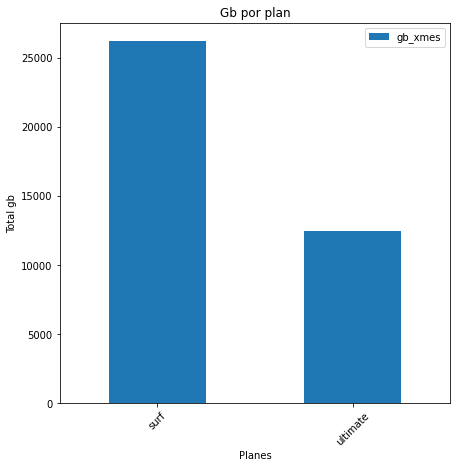

In [38]:
gb_xplan.plot(kind='bar',
               title='Gb por plan',
               xlabel='Planes',
               ylabel='Total gb',
               rot=45,
               figsize=[7,7]
               )
plt.show()


**Con el grafico obtenido podemos observar que los usuarios del plan 'surf' tienden a tener una mayor sonsumo del trafico de internet por mes en comparacion con el pla 'ultimate'**

## Ingreso

In [39]:
datos.head()

,user_id,month,llam_xmes,minutos_xmes,msj_xmes,gb_xmes,first_name,last_name,age,city,...,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,min_extra,msj_extra,gb_extra,total_pay
0,1000,12.0,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
1,1006,11.0,2.0,10.0,15.0,3.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
2,1006,12.0,9.0,59.0,139.0,32.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,30.0,3000,70,7,0.01,0.01,0.0,0.0,14.0,84.0
3,1008,10.0,71.0,476.0,21.0,17.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
4,1008,11.0,63.0,446.0,37.0,24.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0


In [40]:
total_pay_xplan = datos.groupby('plan')[['total_pay']].sum()
total_pay_xplan

,total_pay
plan,
surf,95611.18
ultimate,52346.00


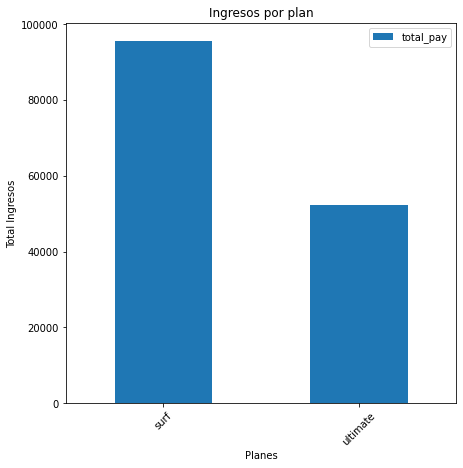

In [41]:
total_pay_xplan.plot(kind='bar',
                    title='Ingresos por plan',
                    xlabel='Planes',
                    ylabel='Total Ingresos',
                    rot=45,
                    figsize=[7,7]
                    )
plt.show()


**Con el grafico obtenido podemos decir que los ingresos obtenidos por el plan 'surf' son mayores a los ingresos del plan 'ultimate'**

## Prueba las hipótesis estadísticas

**Como hipótesis nula probaremos que los ingresos promedio procedentes de los usuarios de los planes de llamada 'ultimate' y 'surf' son iguales**

In [42]:
# Prueba las hipótesis

# ingresos para planes surf
ingresos_surf = datos[datos['plan'] == 'surf']
ingresos_surf = ingresos_surf.loc[:,'total_pay']
display(ingresos_surf.head())

# ingresos para planes ultimate
ingresos_ultimate = datos[datos['plan'] == 'ultimate']
ingresos_ultimate = ingresos_ultimate.loc[:,'total_pay']
display(ingresos_ultimate.head())
print()
alpha = 0.5
results = st.ttest_ind(ingresos_surf, ingresos_ultimate, equal_var = False)

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha:         # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

724    20.00
725    20.00
726    90.09
727    60.00
728    60.00
Name: total_pay, dtype: float64

0    70.0
1    70.0
2    84.0
3    70.0
4    70.0
Name: total_pay, dtype: float64


valor p:  1.2184115852123163e-15
Rechazamos la hipótesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

**Con los resultados obtenidos podemos decir que se rechaza la hipotesis nula ya que el ingresos promedio de los usuarios del plan 'surf' son totalmente distintos a los ingresos del plan 'ultimate'**

------------

**Como hipótesis nula probaremos que los ingresos promedio procedentes de los usuarios de 'New York-Newark-Jersey City, NY-NJ-PA MSA' y los ingresos de los usuarios de otras regiones de los planes de llamada 'ultimate' y 'surf' son iguales**

In [43]:
# Prueba las hipótesis
datos['city'].unique()
# 'New York-Newark-Jersey City, NY-NJ-PA MSA'

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Orlando-Kissimmee-Sanford, FL MSA', 'Cleveland-Elyria, OH MSA',
       'Knoxville, TN MSA', 'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA',
       'Birmingham-Hoover, AL MSA', 'Oklahoma City, OK MSA',
       'Denver-Aurora-Lakewood, CO MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Nashville-Davidson–Murfreesboro–Franklin, TN MSA',
       'Columbus, OH MSA', 'Las Vegas-Henderson-Paradise, NV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA',
       'Miami-Fort Lauderdale-West Palm Beach, FL MSA',
       'Columbia, SC MSA', 'San Antonio-New Braunfels, TX MSA',
       'Charlotte-Concord-Gastonia, NC-SC MSA',
       'Phoenix-Mesa-Chandler, AZ MSA',
       'Riverside-San Bernardino-Ontario, CA MSA',
       'Grand Rapids-Ken

In [44]:
list_xcity =  ['New York-Newark-Jersey City, NY-NJ-PA MSA']
ingresos_ny_nj  =  datos[datos.city.isin(list_xcity)]
ingresos_ny_nj = ingresos_ny_nj.loc[:,'total_pay']
display(ingresos_ny_nj.head())
other_cities =  datos[~datos.city.isin(list_xcity)]
other_cities = other_cities.loc[:,'total_pay']
display(other_cities.head())

alpha = 0.5
results = st.ttest_ind(ingresos_ny_nj, other_cities, equal_var = False)

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha:         # comparar el valor p con el umbral
    print("Se rechaza la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

30    70.0
31    70.0
32    70.0
33    70.0
34    70.0
Name: total_pay, dtype: float64

0    70.0
1    70.0
2    84.0
3    70.0
4    70.0
Name: total_pay, dtype: float64

valor p:  0.03870322661292962
Se rechaza la hipótesis nula


**Con los resultados obtenidos podemos decir que se rechaza la hipotesis nula ya que el ingresos promedio de los usuarios de NY-NJ son totalmente distintos a los ingresos de los usuarios de otras regiones**

## Conclusión general



- **Con el analisis realizado anteriormente podemos decir que por los diferentes servicios ofrecidos por la empresa de telecomunicaciones Megaline, los usuarios del plan'surf' generan un mayor ingresos y ademas tienden a tener un mayor consumo, que hasta llega a duplicarse, en los servicios de internet y mensajes teniendo un consumo similar para el servicio de llamadas.**


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>   
<h1>Comentario General    </h1>
Te felicito por la culminación del proyecto.</div>
